In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Step 1: Create input data
def create_data():
    """
    Create a DataFrame with hours studied and test scores.
    
    Returns:
        pd.DataFrame: A DataFrame with 'Hours_Studied (x)' and 'Test_Score (y)' columns.
    """
    data = {'Hours_Studied (x)': [2, 4, 6, 8],
            'Test_Score (y)': [50, 60, 70, 80]}
    return pd.DataFrame(data)

# Step 2: Fit the simple linear regression model
def fit_regression_model(df):
    """
    Fit a simple linear regression model.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing 'Hours_Studied (x)' and 'Test_Score (y)'.
        
    Returns:
        LinearRegression: The fitted linear regression model.
        np.ndarray: The predicted values.
        float: The slope (coefficient) of the regression line.
        float: The intercept of the regression line.
    """
    X = df[['Hours_Studied (x)']].values  # Predictor (hours studied)
    y = df['Test_Score (y)'].values  # Dependent variable (test scores)
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Get predictions, slope, and intercept
    y_pred = model.predict(X)
    slope = model.coef_[0]
    intercept = model.intercept_

    return model, y_pred, slope, intercept

# Step 3: Calculate residuals and sums of squares
def calculate_sums_of_squares(y, y_pred):
    """
    Calculate residuals, SST, SSE, SSR, and R-squared.
    
    Parameters:
        y (np.ndarray): Actual values.
        y_pred (np.ndarray): Predicted values from the regression model.
    
    Returns:
        dict: A dictionary containing residuals, SST, SSE, SSR, and R-squared.
    """
    residuals = y - y_pred
    SST = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
    SSE = np.sum((residuals) ** 2)  # Sum of squared errors
    SSR = SST - SSE  # Regression sum of squares
    R_squared = SSR / SST  # R-squared
    
    return {
        'residuals': residuals,
        'SST': SST,
        'SSE': SSE,
        'SSR': SSR,
        'R_squared': R_squared
    }

# Step 4: Plot the regression results
def plot_regression(df, y_pred, slope, intercept, stats):
    """
    Plot the regression line, actual data points, and key results.
    
    Parameters:
        df (pd.DataFrame): DataFrame with the original data.
        y_pred (np.ndarray): Predicted values from the regression model.
        slope (float): The slope of the regression line.
        intercept (float): The intercept of the regression line.
        stats (dict): A dictionary containing SST, SSE, SSR, and R-squared.
    """
    plt.figure(figsize=(8, 6))
    
    # Plot actual data points
    plt.scatter(df['Hours_Studied (x)'], df['Test_Score (y)'], color='blue', label='Actual Data')
    
    # Plot regression line
    plt.plot(df['Hours_Studied (x)'], y_pred, color='red', label=f'Regression Line: y = {intercept:.2f} + {slope:.2f}x')

    # Add legend with key results
    plt.legend(title=(f'Regression Results\n'
                      f'y = {intercept:.2f} + {slope:.2f}x\n'
                      f'R² = {stats["R_squared"]:.2f}\n'
                      f'SST = {stats["SST"]:.2f}\n'
                      f'SSR = {stats["SSR"]:.2f}\n'
                      f'SSE = {stats["SSE"]:.2f}'),
               loc='upper left')
    
    # Labels and title
    plt.title('Simple Linear Regression: Hours Studied vs Test Score')
    plt.xlabel('Hours Studied ($x$)')
    plt.ylabel('Test Score ($y$)')
    
    # Show plot
    plt.tight_layout()
    plt.show()


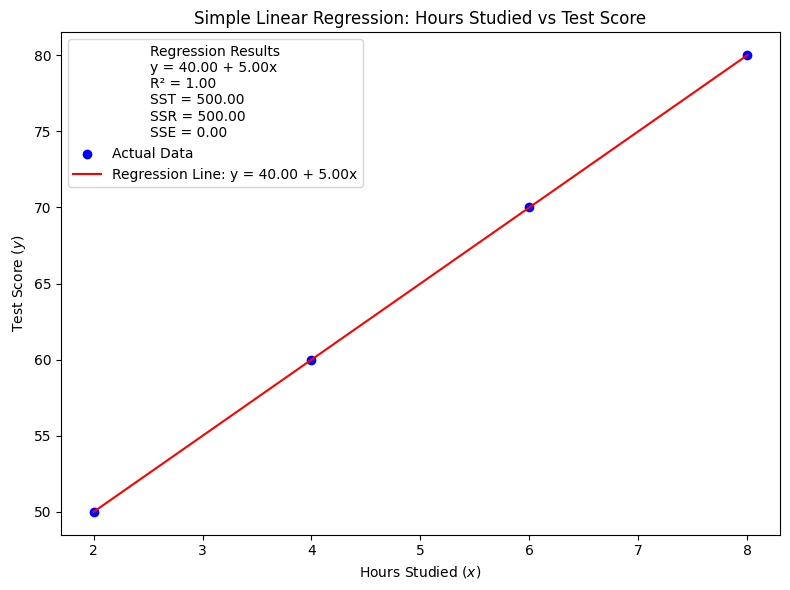

In [3]:
# Step 1: Create the data
df = create_data()

# Step 2: Fit the regression model and make predictions
model, y_pred, slope, intercept = fit_regression_model(df)

# Step 3: Calculate sums of squares and R-squared
stats = calculate_sums_of_squares(df['Test_Score (y)'].values, y_pred)

# Step 4: Plot the regression line, actual data, and key results
plot_regression(df, y_pred, slope, intercept, stats)

In [4]:
slope, intercept, R_squared, SST, SSR, SSE = slope, intercept, stats['R_squared'], stats['SST'], stats['SSR'], stats['SSE']
print(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}, R²: {R_squared:.2f}, "
          f"SST: {SST:.2f}, SSR: {SSR:.2f}, SSE: {SSE:.2f}")

Slope: 5.00, Intercept: 40.00, R²: 1.00, SST: 500.00, SSR: 500.00, SSE: 0.00
